# Where are the sushi bars?... The follow-up!

### Introduction

In a <a href="https://nbviewer.jupyter.org/github/nsfabina/nsfabina.github.io/blob/master/ipynb/sushi_bars.ipynb">previous post</a>, I demonstrated a recursive algorithm for locating all of the sushi restaurants in the United States. Now, I'm going to explore some of that data.

### Minor updates

- Originally, I was querying geographic points within a bounding box around the lower 48 states. The updated dataset also has restaurants from Alaska, Hawaii, and all of Canado and Mexico.

- I had left out rating scores and review counts from the original data parsing, so I queried all businesses in the dataset to get this information.

### Okay, so how many sushi restaurants are there in the US?

In [1]:
import json

# Load data
with open('/Users/nsfabina/nsfabina.github.io/data/data_yelp_sushi.json') as file_:
    data_master = json.load(file_)
    
# Parse businesses
businesses = [business for business in data_master['businesses'].values()
              if business.get('is_closed') is False
              and business.get('country_code') == 'US']

print('{} sushi restaurants in the US'.format(len(businesses)))
print('{} sushi restaurants in the total dataset but outside the US'.format(
        len(data_master['businesses']) - len(businesses)))

14100 sushi restaurants in the US
3303 sushi restaurants in the total dataset but outside the US


### Where are those restaurants located?

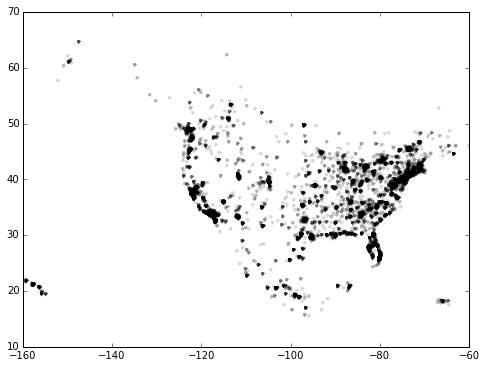

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

def plot_businesses(businesses):
    # Format coordinates
    lons = []
    lats = []
    for business in businesses:
        lon = business.get('longitude')
        lat = business.get('latitude')
        if lon and lat:
            lons.append(lon)
            lats.append(lat)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(lons, lats, '.', c=(0, 0, 0), alpha=0.15)
    plt.show()
    
plot_businesses(data_master['businesses'].values())

### Is our data reliable?

What's our data like? Does every business in our dataset serve sushi?

In [3]:
businesses_not_sushi_bar = list()

for business in businesses:
    if 'Sushi Bars' not in [category[1] for category in business.get('categories')]:
        businesses_not_sushi_bar.append(business)
        
print len(businesses_not_sushi_bar)

1


It looks like a single business is not labeled as a sushi bar, but I was able to confirm that it does have sushi on the menu via it's Yelp URL.

Are there any weird business categories?

In [4]:
unique_categories = set()

for business in businesses:
    unique_categories.update([category[1] for category in business.get('categories')])
    
unique_categories

{u'American (New)',
 u'American (Traditional)',
 u'Asian Fusion',
 u'Bagels',
 u'Bakeries',
 u'Barbeque',
 u'Bars',
 u'Beer Bar',
 u'Beer Gardens',
 u'Beer, Wine & Spirits',
 u'Bowling',
 u'Brazilian',
 u'Breakfast & Brunch',
 u'Bubble Tea',
 u'Buffets',
 u'Burgers',
 u'Burmese',
 u'Butcher',
 u'Cafes',
 u'Cafeteria',
 u'Cajun/Creole',
 u'Cambodian',
 u'Candy Stores',
 u'Cantonese',
 u'Caribbean',
 u'Casinos',
 u'Caterers',
 u'Cheesesteaks',
 u'Chicken Wings',
 u'Chinese',
 u'Cocktail Bars',
 u'Coffee & Tea',
 u'Comedy Clubs',
 u'Comfort Food',
 u'Convenience Stores',
 u'Cooking Classes',
 u'Cooking Schools',
 u'Creperies',
 u'Cuban',
 u'Dance Clubs',
 u'Delis',
 u'Desserts',
 u'Dim Sum',
 u'Diners',
 u'Dive Bars',
 u'Donuts',
 u'Event Planning & Services',
 u'Falafel',
 u'Farmers Market',
 u'Fast Food',
 u'Filipino',
 u'Fish & Chips',
 u'Food',
 u'Food Court',
 u'Food Delivery Services',
 u'Food Stands',
 u'Food Trucks',
 u'French',
 u'Fruits & Veggies',
 u'Gastropubs',
 u'German',
 u

Whoa! Some of these categories make sense, but some are completely out of left field. Can we really get spicy tuna rolls and donuts?

In [5]:
def search_for_category(category):
    printed = False
    num_businesses = 0
    for business in businesses:
        if category in [cats[1] for cats in business['categories']]:
            num_businesses += 1
            if printed is False:
                _pretty_print_business(business)
                printed = True        
    print 'Total businesses in category:  {}'.format(num_businesses)
    

def _pretty_print_business(business):
    print business['name']
    print '{}, {}'.format(business['city'], business['state_code'])
    print business['url']
    print

    
search_for_category('Donuts')

Freshy Donuts & Sushi
Oklahoma City, OK
https://www.yelp.com/biz/freshy-donuts-and-sushi-oklahoma-city-2?adjust_creative=u0iTRwNJwy66eO2Qs-yPZw&utm_campaign=yelp_api&utm_medium=api_v2_search&utm_source=u0iTRwNJwy66eO2Qs-yPZw

Total businesses in category:  1


What about sashimi while we bowl?

In [6]:
search_for_category('Bowling')

Splitsville
Lake Buena Vista, FL
https://www.yelp.com/biz/splitsville-lake-buena-vista?adjust_creative=u0iTRwNJwy66eO2Qs-yPZw&utm_campaign=yelp_api&utm_medium=api_v2_search&utm_source=u0iTRwNJwy66eO2Qs-yPZw

Total businesses in category:  1


Kosher sushi? Yeah right...

In [7]:
search_for_category('Kosher')

Capri Sushi & Italian
Miami Beach, FL
https://www.yelp.com/biz/capri-sushi-and-italian-miami-beach?adjust_creative=u0iTRwNJwy66eO2Qs-yPZw&utm_campaign=yelp_api&utm_medium=api_v2_search&utm_source=u0iTRwNJwy66eO2Qs-yPZw

Total businesses in category:  63


Okay, we have some culinary rebels, but it looks like all of the outliers I've explored actually do serve sushi. That's not to say there isn't bad data in this dataset, but it seems relatively reliable.

### What's the deal with reviews and ratings?

Before creating a few basic figures, I wanted to summarize complexities that make deeper exploration difficult.

- Review counts are a function of restaurant quality, but also dependent on the quality of nearby restaurants, population densities, Yelp adoption, and other factors.

- Rating scores are likely dependent on focal restaurant quality, nearby restaurant quality, population mobility, and other factors; e.g., Olive Garden is the best Italian restaurant if it's the only Italian restaurant.

Hypothetically, we could do some creative analyses if we had additional data.

- Many reviewers are likely to have visited sushi restaurants in multiple regions, and we could use these connections to objectively measure scores across regions. For example, John Smith may have reviewed restaurants in NY, SF, and SLC, while Jane Smith only reviewed restaurants in the greater SLC area.

- Many reviewers are likely to have eaten at a diverse group of restaurants, and we could compare score trends for multiple restaurant categories across regions. For example, average ratings for all restaurants in SF may be 0.5 points higher than those in Tulsa, while sushi restaurants may be 1.5 points higher than those in Tulsa.

In both cases, we gain information by tracking these connections and correlations, rather than treating all scores as independent. Unfortunately, we would need to do much more work to access this data so, again, I'll just create a few basic figures.

### What's the distribution of review counts?

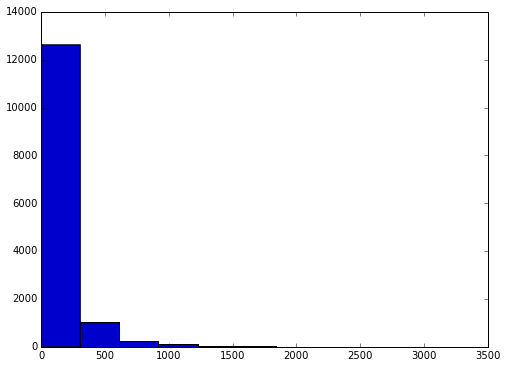

In [8]:
plt.figure(figsize=(8, 6))
plt.hist([business['review_count'] for business in businesses], color=(0, 0, 0.8))
plt.show()

### What's the distribution of rating scores?

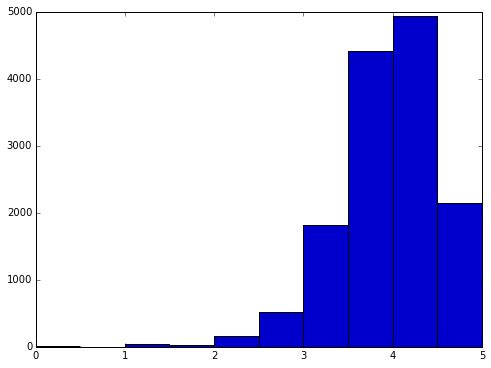

In [9]:
plt.figure(figsize=(8, 6))
plt.hist([business['rating'] for business in businesses], color=(0, 0, 0.8))
plt.show()

### Where are the best sushi restaurants?

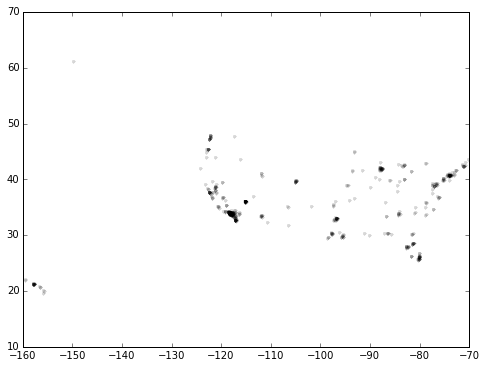

In [10]:
best_restaurants = [business for business in businesses
                    if business['rating'] >= 4.5 and business['review_count'] > 100]

plot_businesses(best_restaurants)